<h1>Test: Discrimination with inconclusive outcome<h1>

<span style="font-family:Huawen Caiyun; font-size:1.2em;">In this notebook we test the evolution of the error probability, when the inconclusiveness probability is added in the cost function.</span>

In [4]:
import sys 
import itertools
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi
from qiskit.algorithms.optimizers import SPSA

plt.style.use('ggplot')
sys.path.append('../')

from quantum_neural_networks import StateDiscriminativeQuantumNeuralNetworks as nnd, QuantumState 

In [5]:
def callback( params, results, prob_error, prob_inc, prob):
    datos.append([prob,prob_error,prob_inc]) 

## 2 States

In [7]:
# Create random states
ψ = QuantumState.random(1)
ϕ = QuantumState.random(1)

# Parameters
th_u, fi_u, lam_u = [0], [0], [0]
th1, th2 = 2 * [0], 2 * [pi]
th_v1, th_v2 = 2 * [0], 2 * [0]
fi_v1, fi_v2 = 2 * [0], 2 * [0]
lam_v1, lam_v2 = 2 * [0], 2 * [0]
params = list(itertools.chain(th_u, fi_u, lam_u, th1, th2, th_v1, th_v2, fi_v1, fi_v2, lam_v1, lam_v2))

# Initialize Discriminator
α_err = 0.6
α_inc = 0.4
discriminator = nnd([ψ, ϕ], True, α_err, α_inc)

datos = []
results = discriminator.discriminate(SPSA(100), params, callback=callback)
print(results)

(array([  3.20467813,  -3.09534125,  -5.47585238,   0.09205138,
         4.07113694,   3.42572173,   5.12265422,  -5.83604108,
        -1.44948314,  -0.68621434,   3.1692794 ,   0.02795769,
         4.52082895, -10.30942632, -13.93677834,   3.23548765,
        -4.13912099,  -8.98289227,  -0.3163083 ]), 0.226171875, 200)


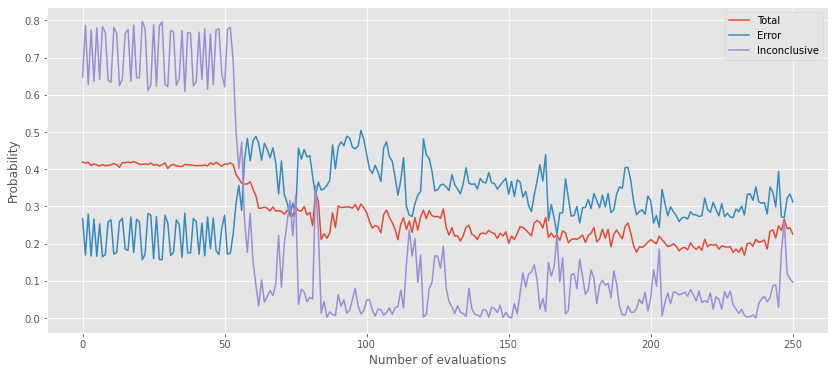

In [8]:
fig = plt.figure(figsize=(14, 6))
plt.plot(datos, '-')
plt.xlabel('Number of evaluations')
plt.ylabel('Probability')
plt.legend(['Total', 'Error', 'Inconclusive'])
plt.title('Evolution of error and inconclusiveness probabilities for 2 states')
plt.show()

## 3 States

In [9]:
# Create random states
ψ = QuantumState.random(1)
ϕ = QuantumState.random(1)
χ = QuantumState.random(1)

# Parameters
th_u, fi_u, lam_u = [0], [0], [0]
th1, th2 = 2 * [0], 2 * [pi]
th_v1, th_v2 = 2 * [0], 2 * [0]
fi_v1, fi_v2 = 2 * [0], 2 * [0]
lam_v1, lam_v2 = 2 * [0], 2 * [0]
params = list(itertools.chain(th_u, fi_u, lam_u, th1, th2, th_v1, th_v2, fi_v1, fi_v2, lam_v1, lam_v2))

# Initialize Discriminator
α_err = 0.6
α_inc = 0.4
discriminator = nnd([ψ, ϕ, χ], True, α_err, α_inc)

datos = []
results = discriminator.discriminate(SPSA(100), params, callback=callback)

print(results)

(array([  3.60353473,  -0.59534399,  -0.69285348,  -3.13036168,
         1.78557464,   6.142732  ,   5.97261424,  -4.58145845,
         6.4851625 ,   3.28455408,  -3.6936481 ,  -8.49597893,
         0.74190715,  -2.78901429,  -0.53282334,   3.81499234,
        -3.39099426, -15.78825931,  -1.79863163]), 0.2244140625, 200)


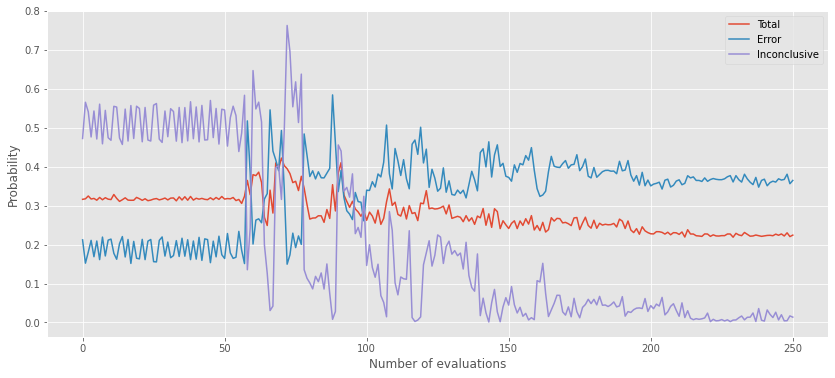

In [10]:
fig = plt.figure(figsize=(14, 6))
plt.plot(datos, '-')
plt.xlabel('Number of evaluations')
plt.ylabel('Probability')
plt.legend(['Total', 'Error', 'Inconclusive'])
plt.title('Evolution of error and inconclusiveness probabilities for 3 states')
plt.show()

In [11]:
# Create random states
ψ = QuantumState.random(1)
ϕ = QuantumState.random(2)
χ = QuantumState.random(3)

# Parameters
th_u, fi_u, lam_u = [0], [0], [0]
th1, th2 = 2 * [0], 2 * [pi]
th_v1, th_v2 = 2 * [0], 2 * [0]
fi_v1, fi_v2 = 2 * [0], 2 * [0]
lam_v1, lam_v2 = 2 * [0], 2 * [0]
params = list(itertools.chain(th_u, fi_u, lam_u, th1, th2, th_v1, th_v2, fi_v1, fi_v2, lam_v1, lam_v2))

# Initialize Discriminator
α_err = 0.6
α_inc = 0.4
discriminator = nnd([ψ, ϕ, χ], True, α_err, α_inc)

datos = []
results = discriminator.discriminate(SPSA(100), params, callback=callback)

print(results)

(array([ 1.10667127,  3.38769808, -4.4388557 ,  3.19179744,  0.1678394 ,
       -0.07677787,  1.49358245,  0.25468112, -3.14051494, -0.13536928,
        0.63439614,  1.5263372 , -1.90742807,  1.7605647 ,  7.11871571,
       -1.60658024, -0.09769807, -1.78745107, -0.63762729]), 0.29070095486111114, 200)


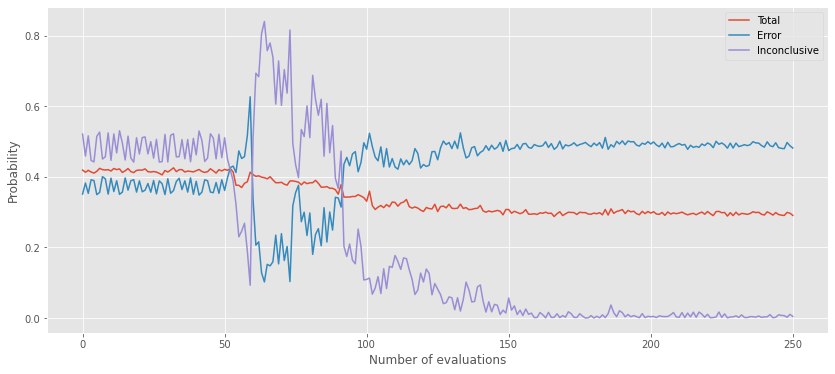

In [12]:
fig = plt.figure(figsize=(14, 6))
plt.plot(datos, '-')
plt.xlabel('Number of evaluations')
plt.ylabel('Probability')
plt.legend(['Total', 'Error', 'Inconclusive'])
plt.title('Evolution of error and inconclusiveness probabilities for 3 states with noise')
plt.show()